In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2024-04-09 18:11:55.520901: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-09 18:11:55.521264: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 18:11:55.523523: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 18:11:55.551944: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 18:11:56.263782: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
train_images.ndim

3

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images.dtype

dtype('uint8')

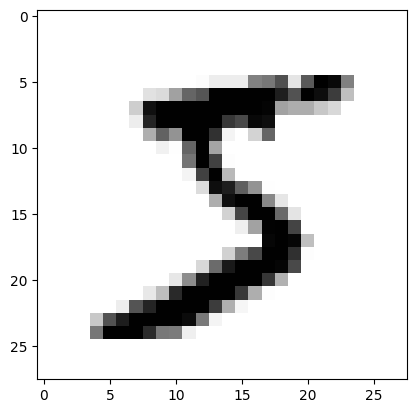

In [7]:
import matplotlib.pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [8]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

Creating Tensors - with intial value

In [9]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
y = tf.zeros(shape=(1,2))
z = tf.random.normal(shape=(3,2), mean=0, stddev=1)
v = tf.random.uniform(shape=(2,3,4), minval=0, maxval=1)
u = tf.random.uniform(shape=(4,3,2), minval=-5, maxval=5, dtype=tf.int64)
print(f"x=\n{x}")
print(f"y=\n{y}")
print(f"z=\n{z}")
print(f"v=\n{v}")
print(f"u=\n{u}")

x=
[[1.]
 [1.]]
y=
[[0. 0.]]
z=
[[-0.49118447  1.226272  ]
 [-0.8741535   0.17401958]
 [-1.2137382   0.3033531 ]]
v=
[[[0.04198349 0.4258051  0.38934684 0.5328295 ]
  [0.88251317 0.6181886  0.24502707 0.30160403]
  [0.28159988 0.82898605 0.6562418  0.952932  ]]

 [[0.08265853 0.5117887  0.48335862 0.8603728 ]
  [0.04292464 0.2483654  0.42886317 0.28715062]
  [0.22939336 0.4542812  0.68043816 0.33743608]]]
u=
[[[-5 -4]
  [ 3 -1]
  [-4  3]]

 [[-1  3]
  [ 1  3]
  [ 0  1]]

 [[-5  2]
  [-2 -4]
  [-4 -1]]

 [[-4 -2]
  [ 0  0]
  [ 0 -3]]]


Tensors are immutable

In [13]:
print(x)
print(x[0,0])
try:
    x[0,0] = 0
except TypeError as e:
    print(e)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


In [18]:
import numpy as np
np_x = np.ones(shape=(2, 1))
print(f"before change=\n{np_x}")
print("the value is",np_x[0,0])
np_x[0,0] = 0
print(f"after change=\n{np_x}")

before change=
[[1.]
 [1.]]
the value is 1.0
after change=
[[0.]
 [1.]]


To have mutable use tf.Variable

In [28]:
var_x = tf.Variable(np_x)
print(f"var_x of type:{type(var_x)}=\n{var_x}")
print(f"cna be converted to {type(var_x.numpy())} -> \n{var_x.numpy()}")
print(f"\n============")

var_y = tf.Variable(y)
print(f"var_y of type:{type(var_y)}=\n{var_y}")
var_y[0, 0].assign(3.)
print(f"var_y after reassigment=\n{var_y}")
var_y.assign_add(tf.ones((1, 2)))
print(f"var_y further reassigment=\n{var_y}")

var_x of type:<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>=
<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[0.],
       [1.]])>
cna be converted to <class 'numpy.ndarray'> -> 
[[0.]
 [1.]]

var_y of type:<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>=
<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[0., 0.]], dtype=float32)>
var_y after reassigment=
<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[3., 0.]], dtype=float32)>
var_y further reassigment=
<tf.Variable 'Variable:0' shape=(1, 2) dtype=float32, numpy=array([[4., 1.]], dtype=float32)>


In [42]:
a = tf.ones((2,2))
# a = tf.random.normal((2,2), mean=2, stddev=1)
print(f"a=\n{a}")
b = tf.square(a)
print(f"b=\n{b}")
c = tf.sqrt(a)
print(f"c=\n{c}")
d = b + c
print(f"d=\n{d}")
e = tf.matmul(a, b)
print(f"e=\n{e}")
e *= d
print(f"e=\n{e}")


a=
[[1. 1.]
 [1. 1.]]
b=
[[1. 1.]
 [1. 1.]]
c=
[[1. 1.]
 [1. 1.]]
d=
[[2. 2.]
 [2. 2.]]
e=
[[2. 2.]
 [2. 2.]]
e=
[[4. 4.]
 [4. 4.]]


Tensofrs can get gradien of diferentiable expression

In [46]:
input_var = tf.Variable(tf.random.uniform(shape=(2,2)))
with tf.GradientTape() as tape:
    result = tf.square(input_var)
    print(f"result=\n{result}")
gradient = tape.gradient(result, input_var)
print(f"gradient=\n{gradient}")

result=
[[0.06688283 0.11010776]
 [0.09706594 0.0279147 ]]
gradient=
[[0.5172343  0.6636498 ]
 [0.62310815 0.3341539 ]]


to track add to watch

In [47]:
input_const  = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
    print(f"result=\n{result}")
grad = tape.gradient(result, input_var)
print(f"gradient=\n{grad}")

result=
9.0
gradient=
None


with gradient type we can perform second derivative

In [52]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
        print(f"position=\n{position}")
    speed = inner_tape.gradient(position, time)
    print(f"speed=\n{speed}")
acceleration = outer_tape.gradient(speed, time)
print(f"acceleration=\n{acceleration}")
print("accesleration is second derivative so become 2 x 4.9")

position=
0.0
speed=
0.0
acceleration=
9.800000190734863
accesleration is second derivative so become 2 x 4.9
